In [1]:
import analyze_telom_length as atl
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
plt.rcParams['figure.figsize'] = (16, 8)

In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [36]:
seq_df = atl.run_telofinder("../../misc/telo")

Running in iterative mode on all '*.fasta', '*.fas', '*.fa' files in '../../misc'

 test_fasta_offset 

offset0
---------------------
left telom length =  27
left offset =  0
right telom length =  0
right offset =  0

 ------------------------------- 


 test_fasta_offset 

offset1
---------------------
left telom length =  28
left offset =  0
right telom length =  0
right offset =  0

 ------------------------------- 


 test_fasta_offset 

offset2
---------------------
left telom length =  29
left offset =  0
right telom length =  0
right offset =  0

 ------------------------------- 


 test_fasta_offset 

offset20
---------------------
left telom length =  33
left offset =  14
right telom length =  0
right offset =  0

 ------------------------------- 


 test_fasta_offset 

offset20G
---------------------
left telom length =  30
left offset =  17
right telom length =  0
right offset =  0

 ------------------------------- 


 test_fasta_offset 

utg84
---------------------
left tel

In [34]:
seq_df

entropy  pattern  skew
test_fasta_offset  offset0 0      0.693147      1.0   1.0
                           1      0.855689      1.0   0.9
                           2      0.855689      1.0   0.9
                           3      0.855689      1.0   0.9
                           4      0.855689      1.0   0.9
                           5      0.855689      1.0   0.9
                           6      0.855689      1.0   0.9
                           7      0.845113      1.0   0.9
                           8      1.012663      1.0   0.8
                           9      1.094056      1.0   0.7
                           10     1.161121      0.0   0.6
                           11     1.248781      0.0   0.5
                           12     1.248781      0.0   0.5
                           13     1.248781      0.0   0.5
                           14     1.235347      0.0   0.5
                           15     1.248781      0.0   0.5
                           16     1.248781      0.0   0.5
                           17     1.248781      0.0   0.5
                           18     1.304011      0.0   0.4
                           19     1.335085      0.0   0.3
                           20     1.353525      0.0   0.2
                           21     1.353525      0.0   0.2
                           22     1.345153      0.0   0.2
                           23     1.319545      0.0   0.2
                           24     1.345153      0.0   0.2
                           25     1.345153      0.0   0.2
                           26     1.345153      0.0   0.2
                           27     1.357786      0.0   0.1
                           28     1.335085      0.0   0.1
                           29     1.335085      0.0   0.1
...                                    ...      ...   ...
test_fasta_file_40 test    19951  0.000000      0.0   NaN
                           19952  0.000000      0.0   NaN
                           19953  0.000000      0.0   NaN
                           19954  0.000000      0.0   NaN
                           19955  0.000000      0.0   NaN
                           19956  0.000000      0.0   NaN
                           19957  0.000000      0.0   NaN
                           19958  0.000000      0.0   NaN
                           19959  0.000000      0.0   NaN
                           19960  0.000000      0.0   NaN
                           19961  0.000000      0.0   NaN
                           19962  0.000000      0.0   NaN
                           19963  0.000000      0.0   NaN
                           19964  0.000000      0.0   NaN
                           19965  0.000000      0.0   NaN
                           19966  0.000000      0.0   NaN
                           19967  0.000000      0.0   NaN
                           19968  0.000000      0.0   NaN
                           19969  0.000000      0.0   NaN
                           19970  0.000000      0.0   NaN
                           19971  0.000000      0.0   NaN
                           19972  0.000000      0.0   NaN
                           19973  0.000000      0.0   NaN
                           19974  0.000000      0.0   NaN
                           19975  0.000000      0.0   NaN
                           19976  0.000000      0.0   NaN
                           19977  0.000000      0.0   NaN
                           19978  0.000000      0.0   NaN
                           19979  0.000000      0.0   NaN
                           19980  0.000000      0.0   NaN

[599430 rows x 3 columns]

In [6]:
a = seq_df.loc["test.telo.blocks", "utg84"].loc[0:40]

/home/khourhin/programs/miniconda3/envs/classic/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


In [7]:
a.head(10)

,entropy,pattern,skew
0,0.647447,1.0,1.0
1,0.647447,1.0,1.0
2,0.647447,1.0,1.0
3,0.647447,1.0,1.0
4,0.673012,1.0,1.0
5,0.647447,1.0,1.0
6,0.673012,1.0,1.0
7,0.647447,1.0,1.0
8,0.673012,1.0,1.0
9,0.673012,1.0,1.0


/home/khourhin/programs/miniconda3/envs/classic/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


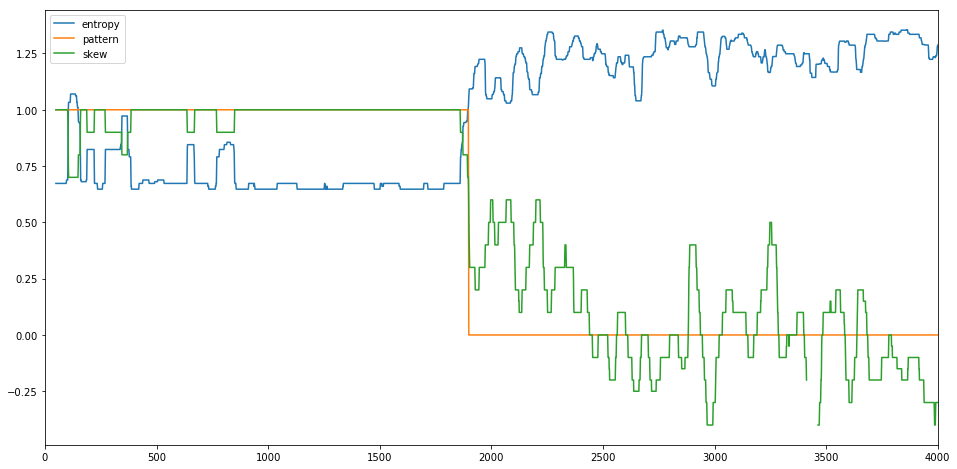

In [10]:
seq_df.loc["test.telo.blocks", "utg84"].loc[0:4000].rolling(50).median().plot()

/home/khourhin/programs/miniconda3/envs/classic/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


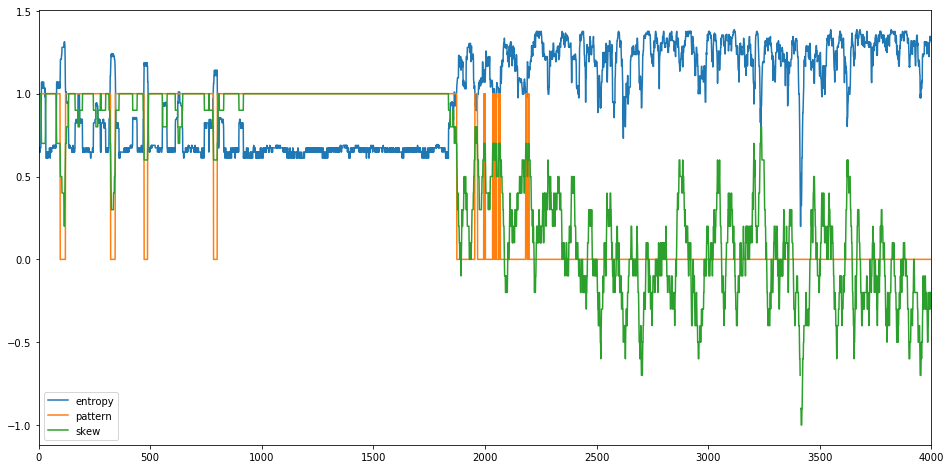

In [11]:
seq_df.loc["test.telo.blocks", "utg84"].loc[0:4000].plot()

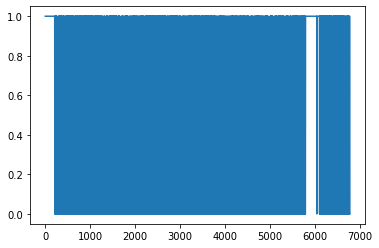

In [106]:
poly_df.loc[("test.telo.blocks", "chrI_ACA_left"),0:10000].transpose().plot()

# For control_not_telom_merging.py refactoring

L61

In [17]:
set("ATTTTAAAT") == {"A", "T"}

True

In [15]:
set(seq) 

{'A', 'C', 'G', 'N', 'T'}

In [4]:
seq = "ACGATCGATCGTAGCTGATGCTAGTCNNNNNGCTAGCTAGCTAGTCGTCGATGTC"

In [13]:
starts_N = seq.find("NNNNN")

In [14]:
starts_N

26

In [88]:
seq = "CACCACCACCACACACCACCACACACTGACGATGACTAGACGT"
for window in atl.sliding_window(seq, 0, len(seq), 10):
    print(atl.get_entropy(window))

0.6108643020548935
0.6730116670092565
0.6108643020548935
0.6730116670092565
0.6730116670092565
0.6730116670092565
0.6730116670092565
0.6730116670092565
0.6730116670092565
0.6730116670092565
0.6730116670092565
0.6730116670092565
0.6730116670092565
0.6730116670092565
0.6730116670092565
0.6730116670092565
0.6730116670092565
0.9433483923290393
1.1682824501765625
1.1935496040981333
1.1935496040981333
1.2798542258336676
1.2798542258336676
1.366158847569202
1.366158847569202
1.366158847569202
1.366158847569202
1.366158847569202
1.3321790402101223
1.366158847569202
1.2798542258336674
1.3321790402101223
1.366158847569202
1.366158847569202


<generator object sliding_window at 0x7fe9f62e7850>

In [73]:
seq2 = ("../../misc/test.telo.blocks", "chrI_ACA_left")
seq2

('../../misc/test.telo.blocks', 'chrI_ACA_left')

In [85]:
import numpy as np
x = 0.1
x*np.log(x)


-0.23025850929940456